Kütüphaneleri import etme ve dataseti yükleme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('dataset/veriseti.xlsx')


In [2]:
df


,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName,CardBankName,CardFamily,CardType
0,35099,558460******5519,1,2023-10-20 13:47:06.007,1,9000.00,2023-10-20 13:47:07,2023-10-20 13:47:08.000,MASTERCARD,DENİZBANK A.Ş.,Bonus,CREDIT
1,35098,526911******1733,1,2023-10-20 13:44:17.000,2,0.60,2023-10-20 13:44:18,2023-10-20 13:44:19.000,MASTERCARD,FİNANS BANK A.Ş.,CardFinans,CREDIT
2,35097,466282******0602,3,2023-10-20 13:43:48.000,1,245.00,2023-10-20 13:43:49,2023-10-20 13:43:50.000,VISA,ALTERNATİF BANK A.Ş.,Bonus,CREDIT
3,35096,411979******8898,1,2023-10-20 13:43:19.000,1,8500.00,2023-10-20 13:43:21,2023-10-20 13:43:22.000,VISA,T. VAKIFLAR BANKASI T.A.O.,World,CREDIT
4,35095,411979******8898,1,2023-10-20 13:40:54.077,1,8500.00,2023-10-20 13:40:55,2023-10-20 13:40:56.000,VISA,T. VAKIFLAR BANKASI T.A.O.,World,CREDIT
...,...,...,...,...,...,...,...,...,...,...,...,...
995,34044,525864******6602,1,2023-10-16 16:05:47.000,1,1100.00,2023-10-16 16:05:48,2023-10-16 16:05:49.000,MASTERCARD,YAPI VE KREDİ BANKASI A.Ş.,World,CREDIT
996,34043,411156******1485,3,2023-10-16 16:04:46.000,2,1275.00,2023-10-16 16:04:48,2023-10-16 16:04:49.010,VISA,ŞEKERBANK T.A.Ş.,Bonus,CREDIT
997,34042,5526 4*********5177,2,2023-10-16 15:57:05.000,2,58830.45,2023-10-16 15:57:06,2023-10-16 15:57:07.000,NaN,NaN,NaN,NaN
998,34041,NaN,2,2023-10-16 15:49:08.000,1,1176.61,NaT,NaT,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PaymentTransactionID     1000 non-null   int64         
 1   Pan                      954 non-null    object        
 2   TransactionType          1000 non-null   int64         
 3   CreateDate               1000 non-null   datetime64[ns]
 4   TransactionStatus        1000 non-null   int64         
 5   Amount                   1000 non-null   object        
 6   TransactionRequestDate   930 non-null    datetime64[ns]
 7   TransactionResponseDate  930 non-null    datetime64[ns]
 8   CardBrandName            883 non-null    object        
 9   CardBankName             883 non-null    object        
 10  CardFamily               723 non-null    object        
 11  CardType                 883 non-null    object        
dtypes: datetime64[ns](3), int64(3), obj

In [4]:
df.describe()


,PaymentTransactionID,TransactionType,TransactionStatus
count,1000.00000,1000.000000,1000.000000
mean,34561.97800,1.969000,1.578000
std,304.31124,0.969009,0.515928
min,34040.00000,1.000000,1.000000
25%,34301.75000,1.000000,1.000000
50%,34557.50000,2.000000,2.000000
75%,34820.25000,3.000000,2.000000
max,35099.00000,3.000000,6.000000


Eksik Verileri Kontrol Etme

In [6]:
df.isnull().sum()

PaymentTransactionID         0
Pan                         46
TransactionType              0
CreateDate                   0
TransactionStatus            0
Amount                       0
TransactionRequestDate      70
TransactionResponseDate     70
CardBrandName              117
CardBankName               117
CardFamily                 277
CardType                   117
dtype: int64

Amount sütunundaki verilerimiz string olarak gözüküyor, onları sayısal hale getiriyoruz.

In [8]:
# Convert 'Amount' column to string to handle non-numeric values
df['Amount'] = df['Amount'].astype(str)

# Identify non-numeric values before conversion
non_numeric_amount = df[~df['Amount'].str.replace(',', '').str.replace('.', '').str.isdigit()]

print("Non-numeric values in 'Amount' before conversion:")
print(non_numeric_amount[['Amount']])

# Convert 'Amount' to numeric, removing non-numeric characters
df['Amount'] = pd.to_numeric(df['Amount'].str.replace(',', '').str.replace('[^0-9.]', '', regex=True), errors='coerce')

print("Null values in 'Amount' after conversion:")
print(df['Amount'].isnull().sum())

Non-numeric values in 'Amount' before conversion:
                  Amount
244  1945-10-01 00:00:00
519  1945-10-01 00:00:00
521  2020-11-01 00:00:00
603  1945-10-01 00:00:00
749  1945-10-01 00:00:00
806  2025-01-01 00:00:00
Null values in 'Amount' after conversion:
0


Bazı date formatları normalden farklı, hepsini aynı olacak şekilde düzeltiyoruz

Null values in 'CreateDate' after conversion:
0
Null values in 'TransactionRequestDate' after conversion:
70
Null values in 'TransactionResponseDate' after conversion:
70


array([[<Axes: title={'center': 'PaymentTransactionID'}>,
        <Axes: title={'center': 'TransactionType'}>,
        <Axes: title={'center': 'CreateDate'}>],
       [<Axes: title={'center': 'TransactionStatus'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'TransactionRequestDate'}>],
       [<Axes: title={'center': 'TransactionResponseDate'}>, <Axes: >,
        <Axes: >]], dtype=object)

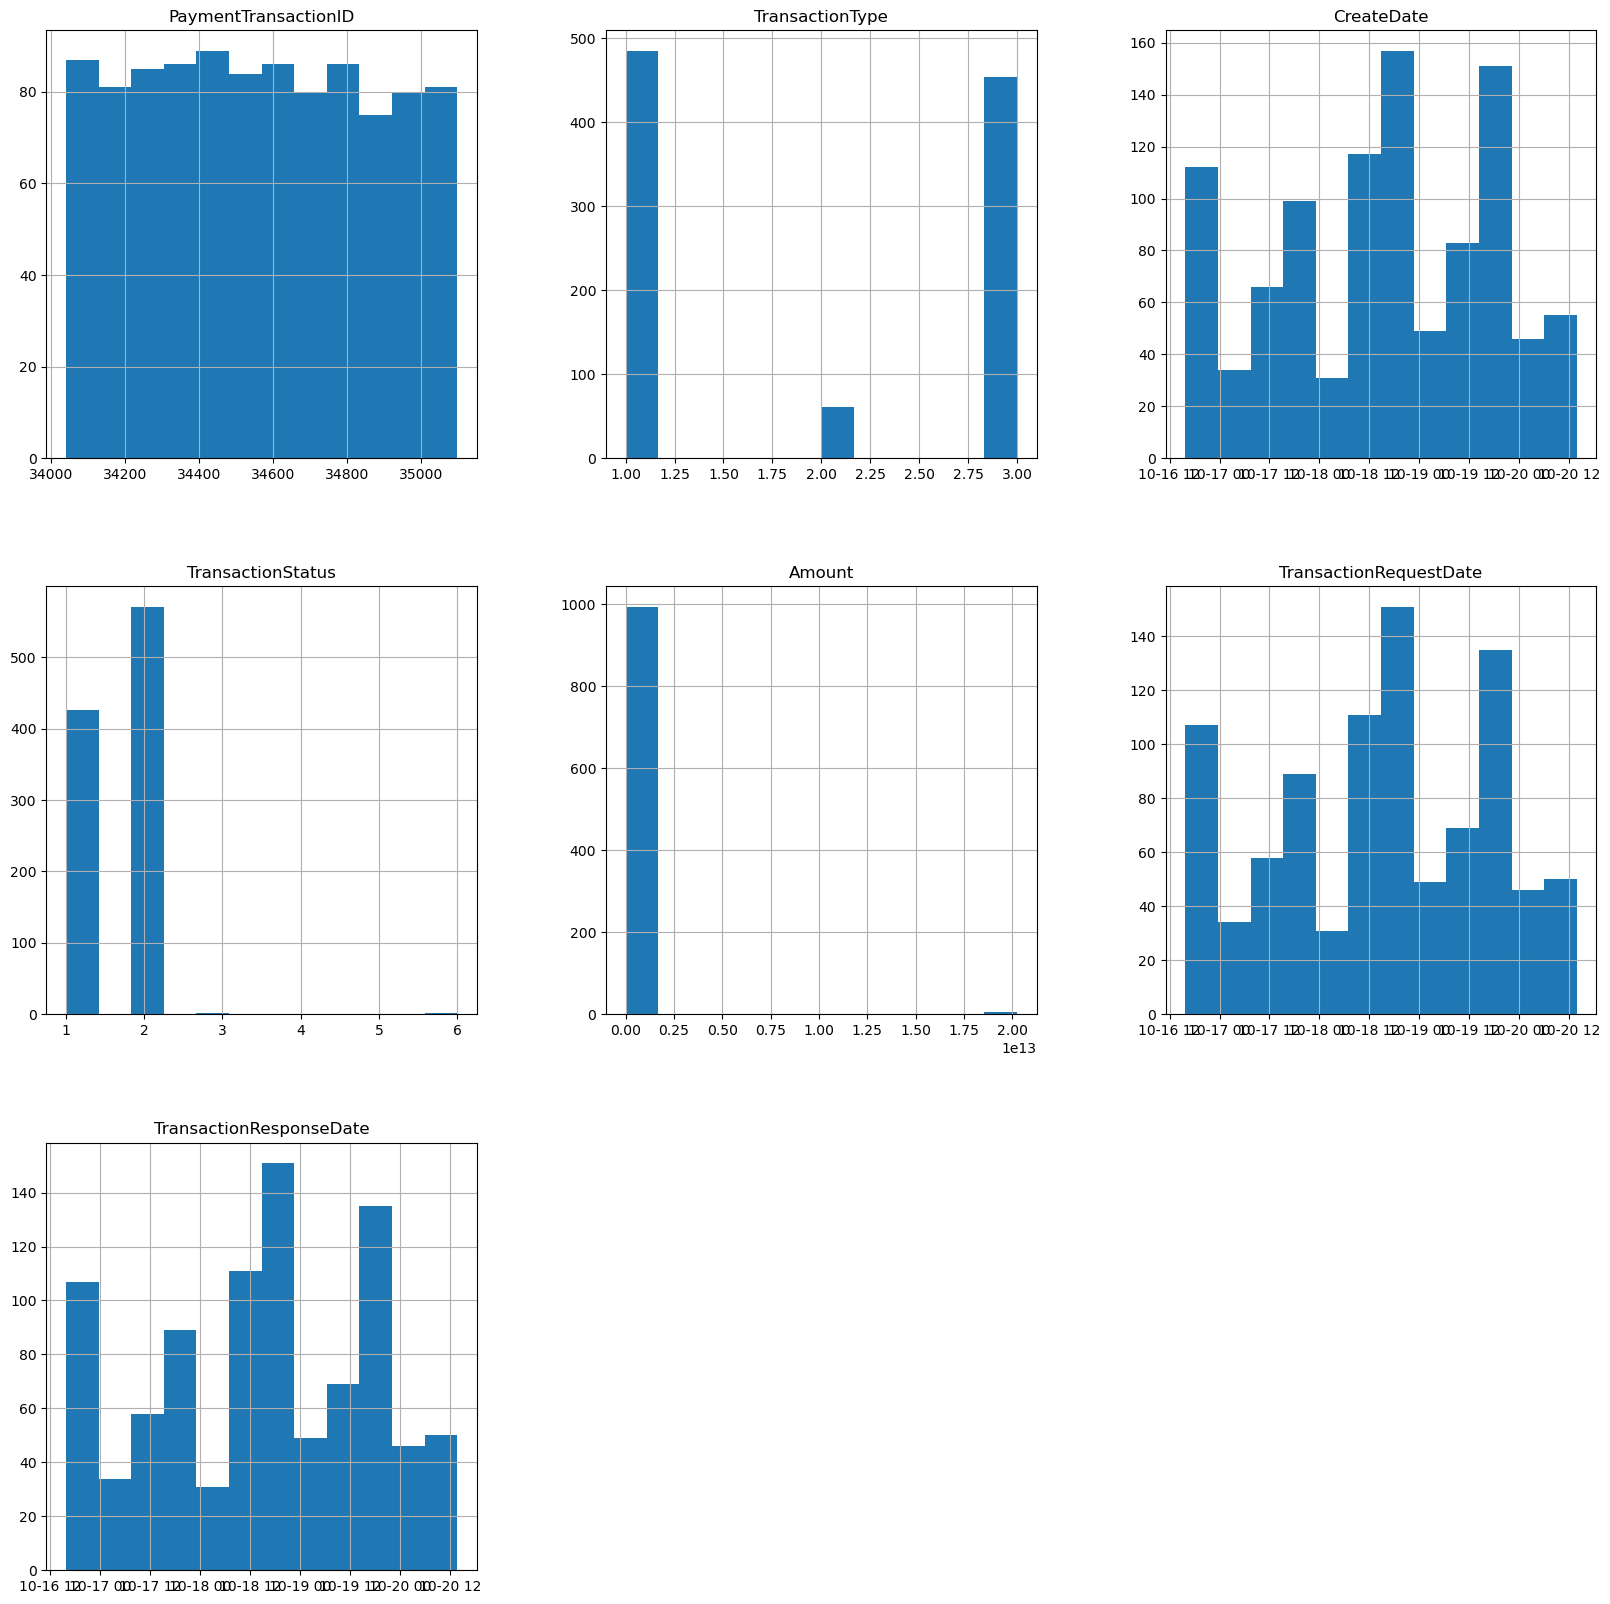

In [11]:
# Convert date columns to datetime
df['CreateDate'] = pd.to_datetime(df['CreateDate'], errors='coerce')
df['TransactionRequestDate'] = pd.to_datetime(df['TransactionRequestDate'], errors='coerce')
df['TransactionResponseDate'] = pd.to_datetime(df['TransactionResponseDate'], errors='coerce')

print("Null values in 'CreateDate' after conversion:")
print(df['CreateDate'].isnull().sum())
print("Null values in 'TransactionRequestDate' after conversion:")
print(df['TransactionRequestDate'].isnull().sum())
print("Null values in 'TransactionResponseDate' after conversion:")
print(df['TransactionResponseDate'].isnull().sum())

df['CreateDate']
df.hist(bins = 12, figsize = (20, 20))

Pan, Cardbankname, CardBrand ve CardType sütunudaki eksik verilerin olduğu recordları kaldırıyoruz ve date formatı içeren sütunlardaki eksik verileri ise forward-fill uygulayarak dolduruyoruz

In [13]:
# Clean the dataset by dropping rows with null 'Pan', 'CardBrandName', 'CardBankName', and 'CardType'
df_cleaned = df.dropna(subset=['Pan', 'CardBrandName', 'CardBankName', 'CardType'])

# Forward fill missing dates
df_cleaned['CreateDate'] = df_cleaned['CreateDate'].ffill()
df_cleaned['TransactionRequestDate'] = df_cleaned['TransactionRequestDate'].ffill()
df_cleaned['TransactionResponseDate'] = df_cleaned['TransactionResponseDate'].ffill()

# Handle missing values in 'CardFamily'
df_cleaned.loc[(df_cleaned['CardType'] == 'DEBIT') & (df_cleaned['CardFamily'].isnull()), 'CardFamily'] = 'NoFamily'

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PaymentTransactionID     883 non-null    int64         
 1   Pan                      883 non-null    object        
 2   TransactionType          883 non-null    int64         
 3   CreateDate               883 non-null    datetime64[ns]
 4   TransactionStatus        883 non-null    int64         
 5   Amount                   883 non-null    float64       
 6   TransactionRequestDate   883 non-null    datetime64[ns]
 7   TransactionResponseDate  883 non-null    datetime64[ns]
 8   CardBrandName            883 non-null    object        
 9   CardBankName             883 non-null    object        
 10  CardFamily               866 non-null    object        
 11  CardType                 883 non-null    object        
dtypes: datetime64[ns](3), float64(1), in

Datatype'ı object olan sütunlarda One-hot Encoding uyguluyoruz 

   PaymentTransactionID               Pan  TransactionType  \
0                 35099  558460******5519                1   
1                 35098  526911******1733                1   
2                 35097  466282******0602                3   
3                 35096  411979******8898                1   
4                 35095  411979******8898                1   

               CreateDate  TransactionStatus  Amount TransactionRequestDate  \
0 2023-10-20 13:47:06.007                  1  9000.0    2023-10-20 13:47:07   
1 2023-10-20 13:44:17.000                  2     0.6    2023-10-20 13:44:18   
2 2023-10-20 13:43:48.000                  1   245.0    2023-10-20 13:43:49   
3 2023-10-20 13:43:19.000                  1  8500.0    2023-10-20 13:43:21   
4 2023-10-20 13:40:54.077                  1  8500.0    2023-10-20 13:40:55   

  TransactionResponseDate  CardBrandName_AMEX  CardBrandName_MASTERCARD  ...  \
0     2023-10-20 13:47:08                   0                         1 

array([[<Axes: title={'center': 'PaymentTransactionID'}>,
        <Axes: title={'center': 'TransactionType'}>,
        <Axes: title={'center': 'CreateDate'}>,
        <Axes: title={'center': 'TransactionStatus'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'TransactionRequestDate'}>,
        <Axes: title={'center': 'TransactionResponseDate'}>],
       [<Axes: title={'center': 'CardBrandName_AMEX'}>,
        <Axes: title={'center': 'CardBrandName_MASTERCARD'}>,
        <Axes: title={'center': 'CardBrandName_TROY'}>,
        <Axes: title={'center': 'CardBrandName_VISA'}>,
        <Axes: title={'center': 'CardBankName_AKBANK T.A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_AKTİF YATIRIM BANKASI A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_ALTERNATİF BANK A.Ş.'}>],
       [<Axes: title={'center': 'CardBankName_DENİZBANK A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_FIBABANKA A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_F

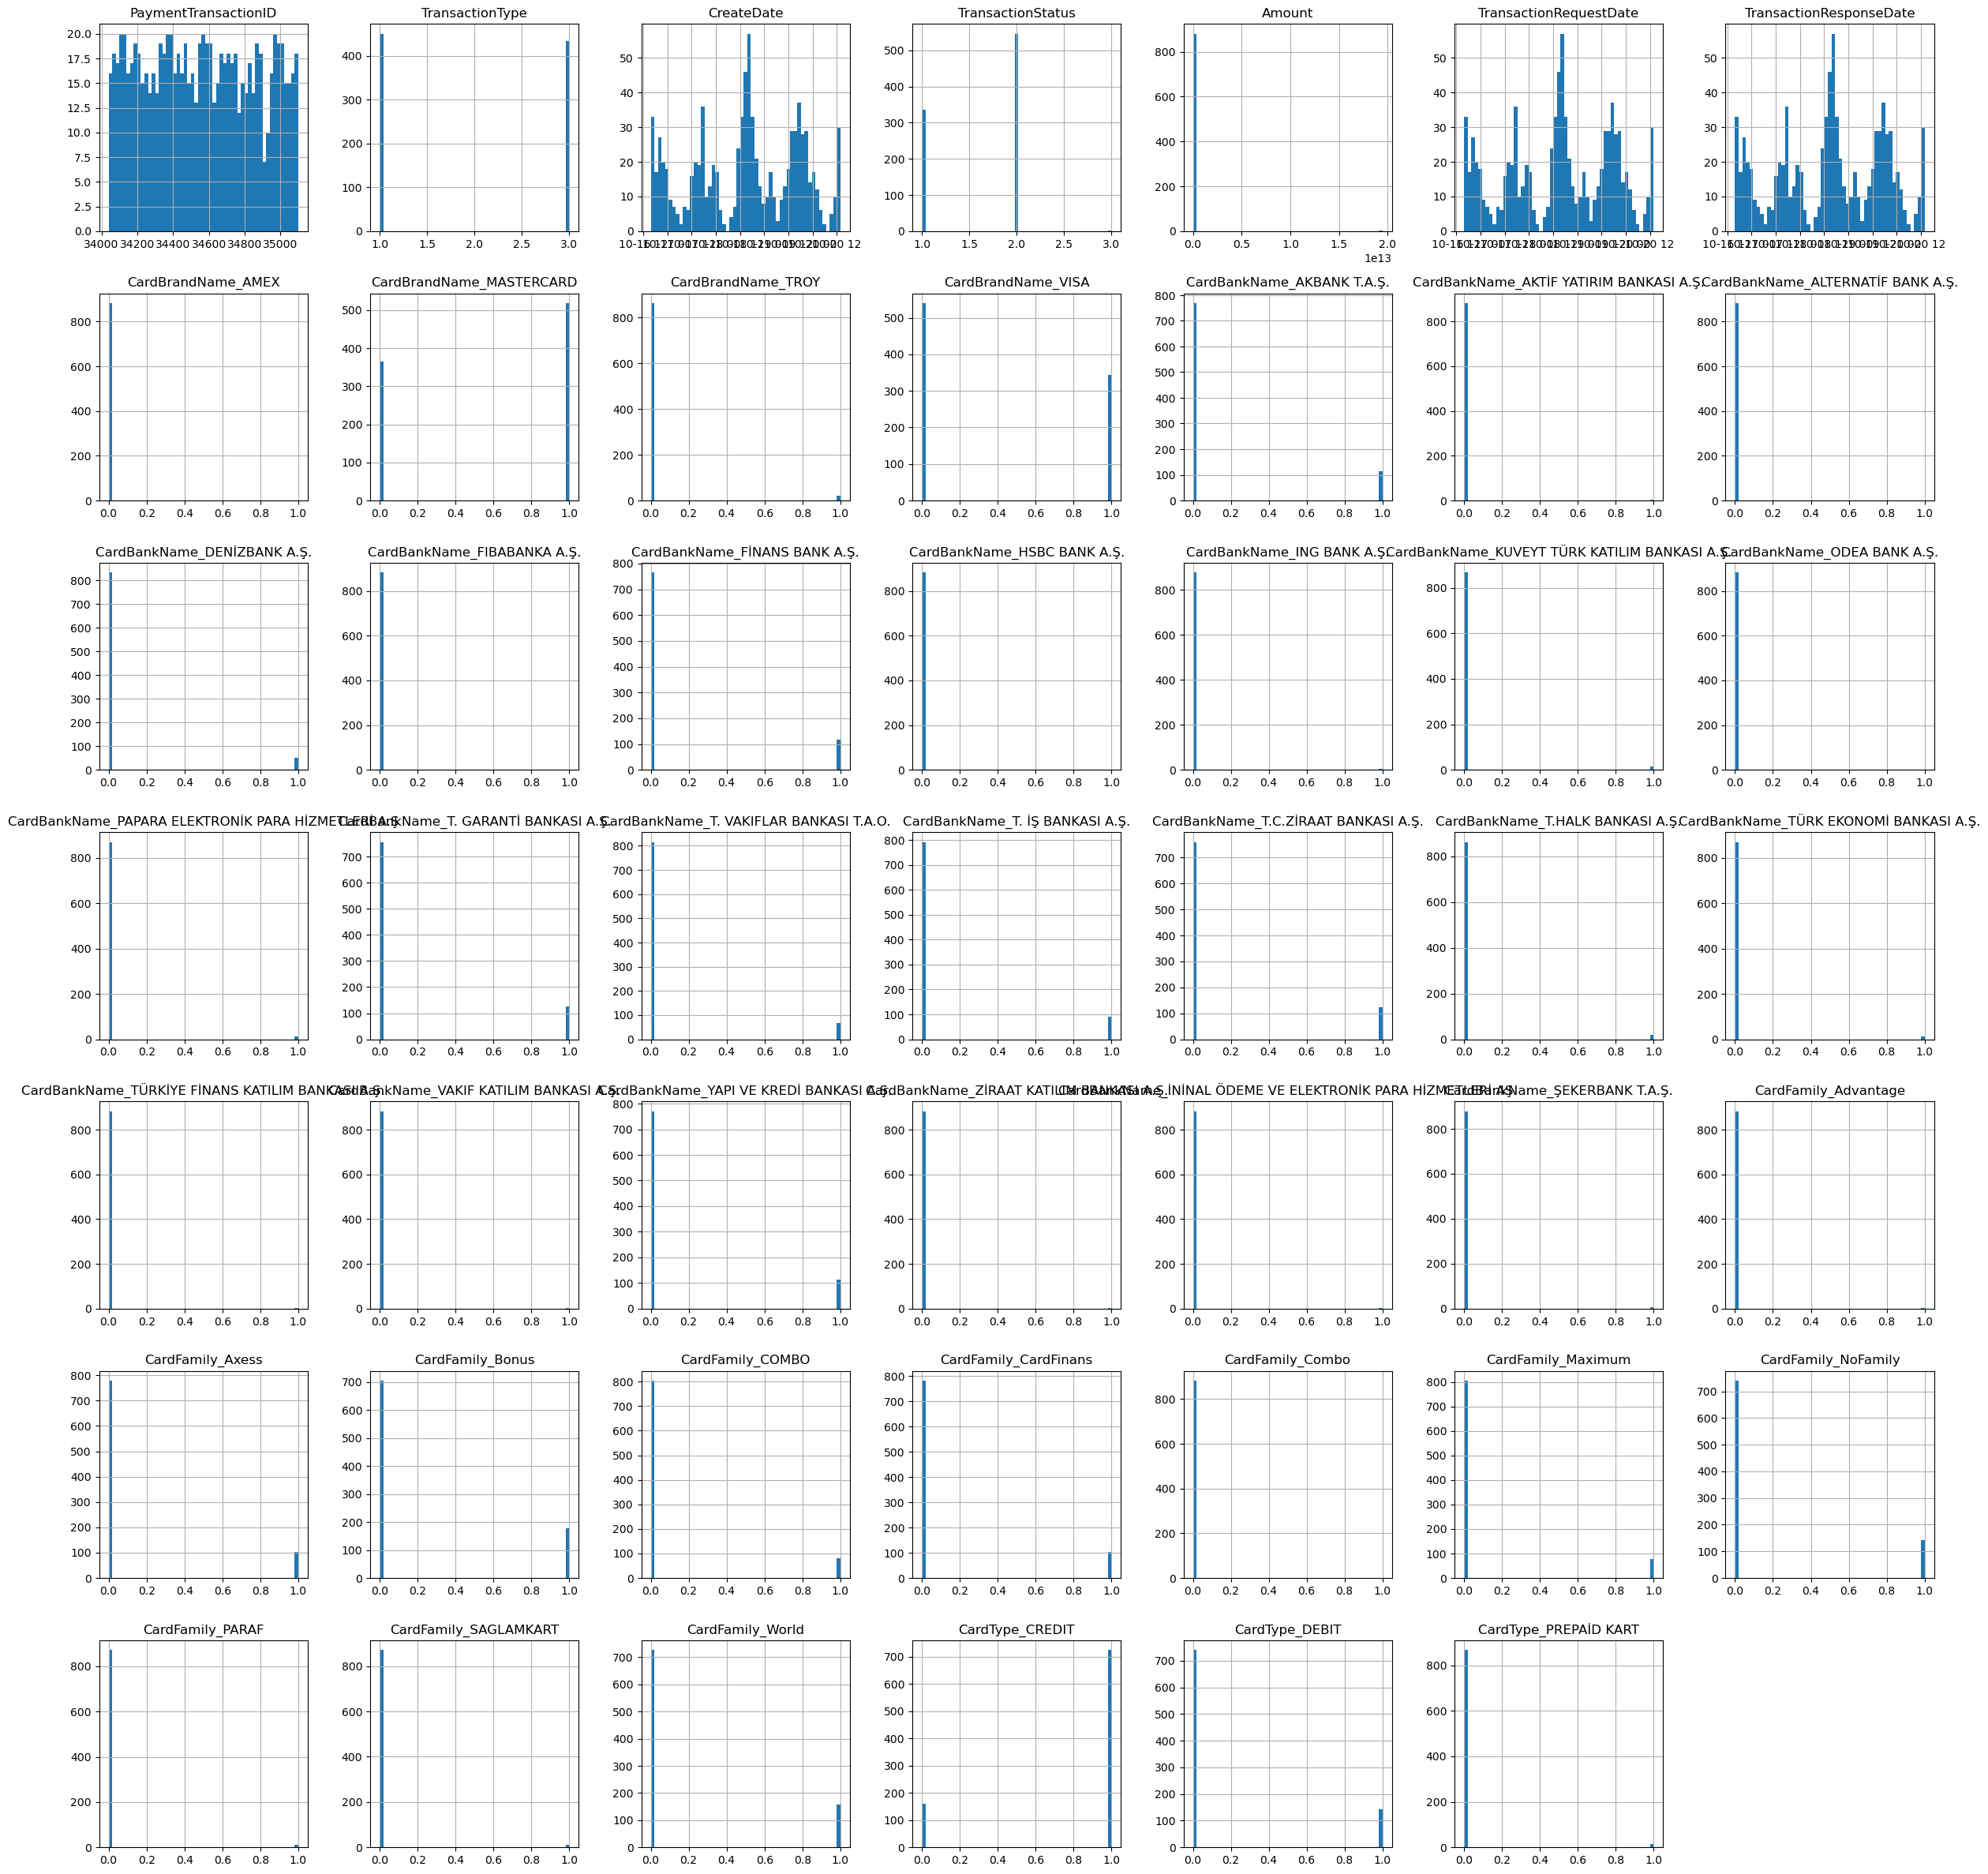

In [16]:
df_encoded = pd.get_dummies(df_cleaned, columns=['CardBrandName', 'CardBankName', 'CardFamily', 'CardType'])

print(df_encoded.head())
print(df_encoded.info())
df_encoded.hist(bins = 53, figsize = (30,30))

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   PaymentTransactionID                                         883 non-null    int64         
 1   Pan                                                          883 non-null    object        
 2   TransactionType                                              883 non-null    int64         
 3   CreateDate                                                   883 non-null    datetime64[ns]
 4   TransactionStatus                                            883 non-null    int64         
 5   Amount                                                       883 non-null    float64       
 6   TransactionRequestDate                                       883 non-null    datetime64[ns]
 7   TransactionRespon

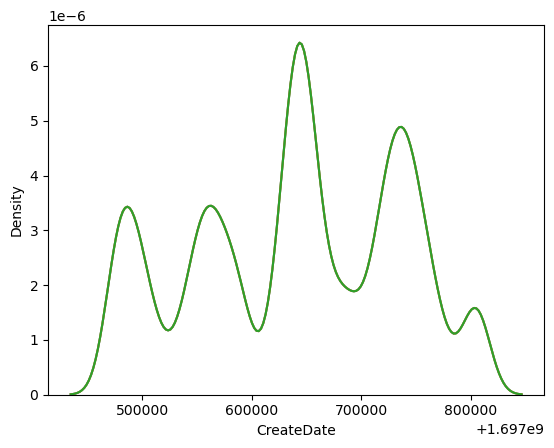

In [18]:
df_encoded['Fraud'] = 0
kde_create_date = sns.kdeplot(df_encoded['CreateDate'].astype(int) // 10**9, bw_adjust=0.5).get_lines()[0].get_data()
kde_request_date = sns.kdeplot(df_encoded['TransactionRequestDate'].astype(int) // 10**9, bw_adjust=0.5).get_lines()[0].get_data()
kde_response_date = sns.kdeplot(df_encoded['TransactionResponseDate'].astype(int) // 10**9, bw_adjust=0.5).get_lines()[0].get_data()

def sample_dates(kde_data, size):
    x, y = kde_data
    y_cum = np.cumsum(y) / np.sum(y)
    random_samples = np.random.rand(size)
    sampled_dates_int = np.interp(random_samples, y_cum, x)
    sampled_dates = pd.to_datetime(sampled_dates_int, unit = 's')
    return sampled_dates

In [19]:
df_encoded

,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName_AMEX,CardBrandName_MASTERCARD,...,CardFamily_Combo,CardFamily_Maximum,CardFamily_NoFamily,CardFamily_PARAF,CardFamily_SAGLAMKART,CardFamily_World,CardType_CREDIT,CardType_DEBIT,CardType_PREPAİD KART,Fraud
0,35099,558460******5519,1,2023-10-20 13:47:06.007,1,9000.00,2023-10-20 13:47:07.000,2023-10-20 13:47:08.000,0,1,...,0,0,0,0,0,0,1,0,0,0
1,35098,526911******1733,1,2023-10-20 13:44:17.000,2,0.60,2023-10-20 13:44:18.000,2023-10-20 13:44:19.000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,35097,466282******0602,3,2023-10-20 13:43:48.000,1,245.00,2023-10-20 13:43:49.000,2023-10-20 13:43:50.000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,35096,411979******8898,1,2023-10-20 13:43:19.000,1,8500.00,2023-10-20 13:43:21.000,2023-10-20 13:43:22.000,0,0,...,0,0,0,0,0,1,1,0,0,0
4,35095,411979******8898,1,2023-10-20 13:40:54.077,1,8500.00,2023-10-20 13:40:55.000,2023-10-20 13:40:56.000,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,34046,531157******6631,1,2023-10-16 16:12:44.000,1,49472.30,2023-10-16 16:12:45.000,2023-10-16 16:12:46.000,0,1,...,0,0,0,0,0,0,1,0,0,0
994,34045,529876******4768,1,2023-10-16 16:06:21.030,2,23578.51,2023-10-16 16:06:22.043,2023-10-16 16:06:22.000,0,1,...,0,0,0,0,0,0,1,0,0,0
995,34044,525864******6602,1,2023-10-16 16:05:47.000,1,1100.00,2023-10-16 16:05:48.000,2023-10-16 16:05:49.000,0,1,...,0,0,0,0,0,1,1,0,0,0
996,34043,411156******1485,3,2023-10-16 16:04:46.000,2,1275.00,2023-10-16 16:04:48.000,2023-10-16 16:04:49.010,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
def expand_dataset(df, kde_create, kde_request, kde_response, times=5, amount_variation=0.1):
    expanded_df = pd.DataFrame()
    for _ in range(times): 
        temp_df = df.copy()
        size = len(temp_df)
        
        temp_df['CreateDate'] = sample_dates(kde_create, size)
        temp_df['TransactionRequestDate'] = sample_dates(kde_request, size)
        temp_df['TransactionResponseDate'] = sample_dates(kde_response, size)
        
        temp_df['Amount'] = temp_df['Amount'] * (1 + np.random.uniform(-amount_variation, amount_variation, size=size))
        
        expanded_df = pd.concat([expanded_df, temp_df], ignore_index=True)
    
    expanded_df = expanded_df.sort_values(by='CreateDate').reset_index(drop=True)
    return expanded_df

df_expanded = expand_dataset(df_encoded, kde_create_date, kde_request_date, kde_response_date, times=5)
df_expanded

,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName_AMEX,CardBrandName_MASTERCARD,...,CardFamily_Combo,CardFamily_Maximum,CardFamily_NoFamily,CardFamily_PARAF,CardFamily_SAGLAMKART,CardFamily_World,CardType_CREDIT,CardType_DEBIT,CardType_PREPAİD KART,Fraud
0,35023,526911******6019,3,2023-10-16 07:25:30.976693248,2,231.570264,2023-10-18 15:13:51.968375552,2023-10-18 01:28:51.187324416,0,1,...,0,0,0,0,0,0,1,0,0,0
1,34468,444677******3999,1,2023-10-16 08:07:10.202443264,1,428.945685,2023-10-20 01:54:52.171740416,2023-10-18 16:18:58.269474560,0,0,...,0,0,0,0,0,0,1,0,0,0
2,34284,454359******8675,1,2023-10-16 08:50:45.897568000,1,9775.251485,2023-10-19 15:43:15.527788544,2023-10-20 04:29:37.253689344,0,0,...,0,1,0,0,0,0,1,0,0,0
3,34282,540669******3014,1,2023-10-16 08:58:27.545518080,2,1318.374810,2023-10-16 22:12:30.278043648,2023-10-19 16:08:17.084499200,0,1,...,0,0,0,0,0,0,1,0,0,0
4,34754,492130******7518,3,2023-10-16 09:32:15.390416384,2,502.546658,2023-10-17 13:45:10.989412096,2023-10-19 15:35:58.491531008,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,34961,516840******1456,3,2023-10-20 18:59:56.870430976,1,9.340251,2023-10-18 12:52:07.596004608,2023-10-17 04:28:29.141881344,0,1,...,0,0,1,0,0,0,0,1,0,0
4411,34100,545847******1082,1,2023-10-20 19:29:17.340502016,2,7409.894346,2023-10-19 10:54:43.024741888,2023-10-18 17:59:12.889831936,0,1,...,0,0,0,0,0,0,1,0,0,0
4412,34882,557113******5210,3,2023-10-20 20:05:34.887821056,2,258.878873,2023-10-18 23:15:19.296429056,2023-10-18 21:01:00.232814848,0,1,...,0,0,0,0,0,0,1,0,0,0
4413,34829,554960******9763,1,2023-10-20 22:52:34.634798080,1,25944.732470,2023-10-17 17:47:51.219173120,2023-10-16 17:05:18.337664000,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
from datetime import timedelta

# time = saniye
def create_fraudulent_transactions(df, pan, min_attempts=3, max_attempts=10, min_time=10, max_time=900):
    original_transaction = df[df['Pan'] == pan].iloc[0]
    start_time = original_transaction['CreateDate']
    
    num_attempts = np.random.randint(min_attempts, max_attempts)  
    original_amount = original_transaction['Amount'] 
    fraudulent_transactions = []
    
    for i in range(num_attempts):
        transaction = original_transaction.copy()
        random_seconds = np.random.randint(min_time, max_time)  
        transaction['CreateDate'] = start_time + timedelta(seconds=random_seconds * i) 
        
        decrease_pct = np.random.uniform(0.01, 0.15)
        transaction['Amount'] = max(0, original_amount * (1 - (decrease_pct * (i + 1))))
        
        if i < num_attempts - 1:
            transaction['TransactionStatus'] = 1  
            transaction['Fraud'] = 1  
        else:
            transaction['TransactionStatus'] = 2  
            transaction['Fraud'] = 1  
        
        fraudulent_transactions.append(transaction)
    
    return pd.DataFrame(fraudulent_transactions)

pan_numbers = df_expanded['Pan'].unique()[:50]
all_fraudulent_transactions = pd.concat([create_fraudulent_transactions(df_expanded, pan, min_attempts=3, max_attempts=10) for pan in pan_numbers], ignore_index=True)

df_final = pd.concat([df_expanded, all_fraudulent_transactions], ignore_index=True)

if 'minute' in df_final.columns:
    df_final = df_final.drop(columns=['minute'])

df_final = df_final.sort_values(by=['Pan', 'CreateDate']).reset_index(drop=True)

fraud_counts = df_final['Fraud'].value_counts()
print(fraud_counts)
df_final.isnull().sum()

0    4415
1     304
Name: Fraud, dtype: int64


PaymentTransactionID                                           0
Pan                                                            0
TransactionType                                                0
CreateDate                                                     0
TransactionStatus                                              0
Amount                                                         0
TransactionRequestDate                                         0
TransactionResponseDate                                        0
CardBrandName_AMEX                                             0
CardBrandName_MASTERCARD                                       0
CardBrandName_TROY                                             0
CardBrandName_VISA                                             0
CardBankName_AKBANK T.A.Ş.                                     0
CardBankName_AKTİF YATIRIM BANKASI A.Ş.                        0
CardBankName_ALTERNATİF BANK A.Ş.                              0
CardBankName_DENİZBANK A.

array([[<Axes: title={'center': 'PaymentTransactionID'}>,
        <Axes: title={'center': 'TransactionType'}>,
        <Axes: title={'center': 'CreateDate'}>,
        <Axes: title={'center': 'TransactionStatus'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'TransactionRequestDate'}>,
        <Axes: title={'center': 'TransactionResponseDate'}>],
       [<Axes: title={'center': 'CardBrandName_AMEX'}>,
        <Axes: title={'center': 'CardBrandName_MASTERCARD'}>,
        <Axes: title={'center': 'CardBrandName_TROY'}>,
        <Axes: title={'center': 'CardBrandName_VISA'}>,
        <Axes: title={'center': 'CardBankName_AKBANK T.A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_AKTİF YATIRIM BANKASI A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_ALTERNATİF BANK A.Ş.'}>],
       [<Axes: title={'center': 'CardBankName_DENİZBANK A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_FIBABANKA A.Ş.'}>,
        <Axes: title={'center': 'CardBankName_F

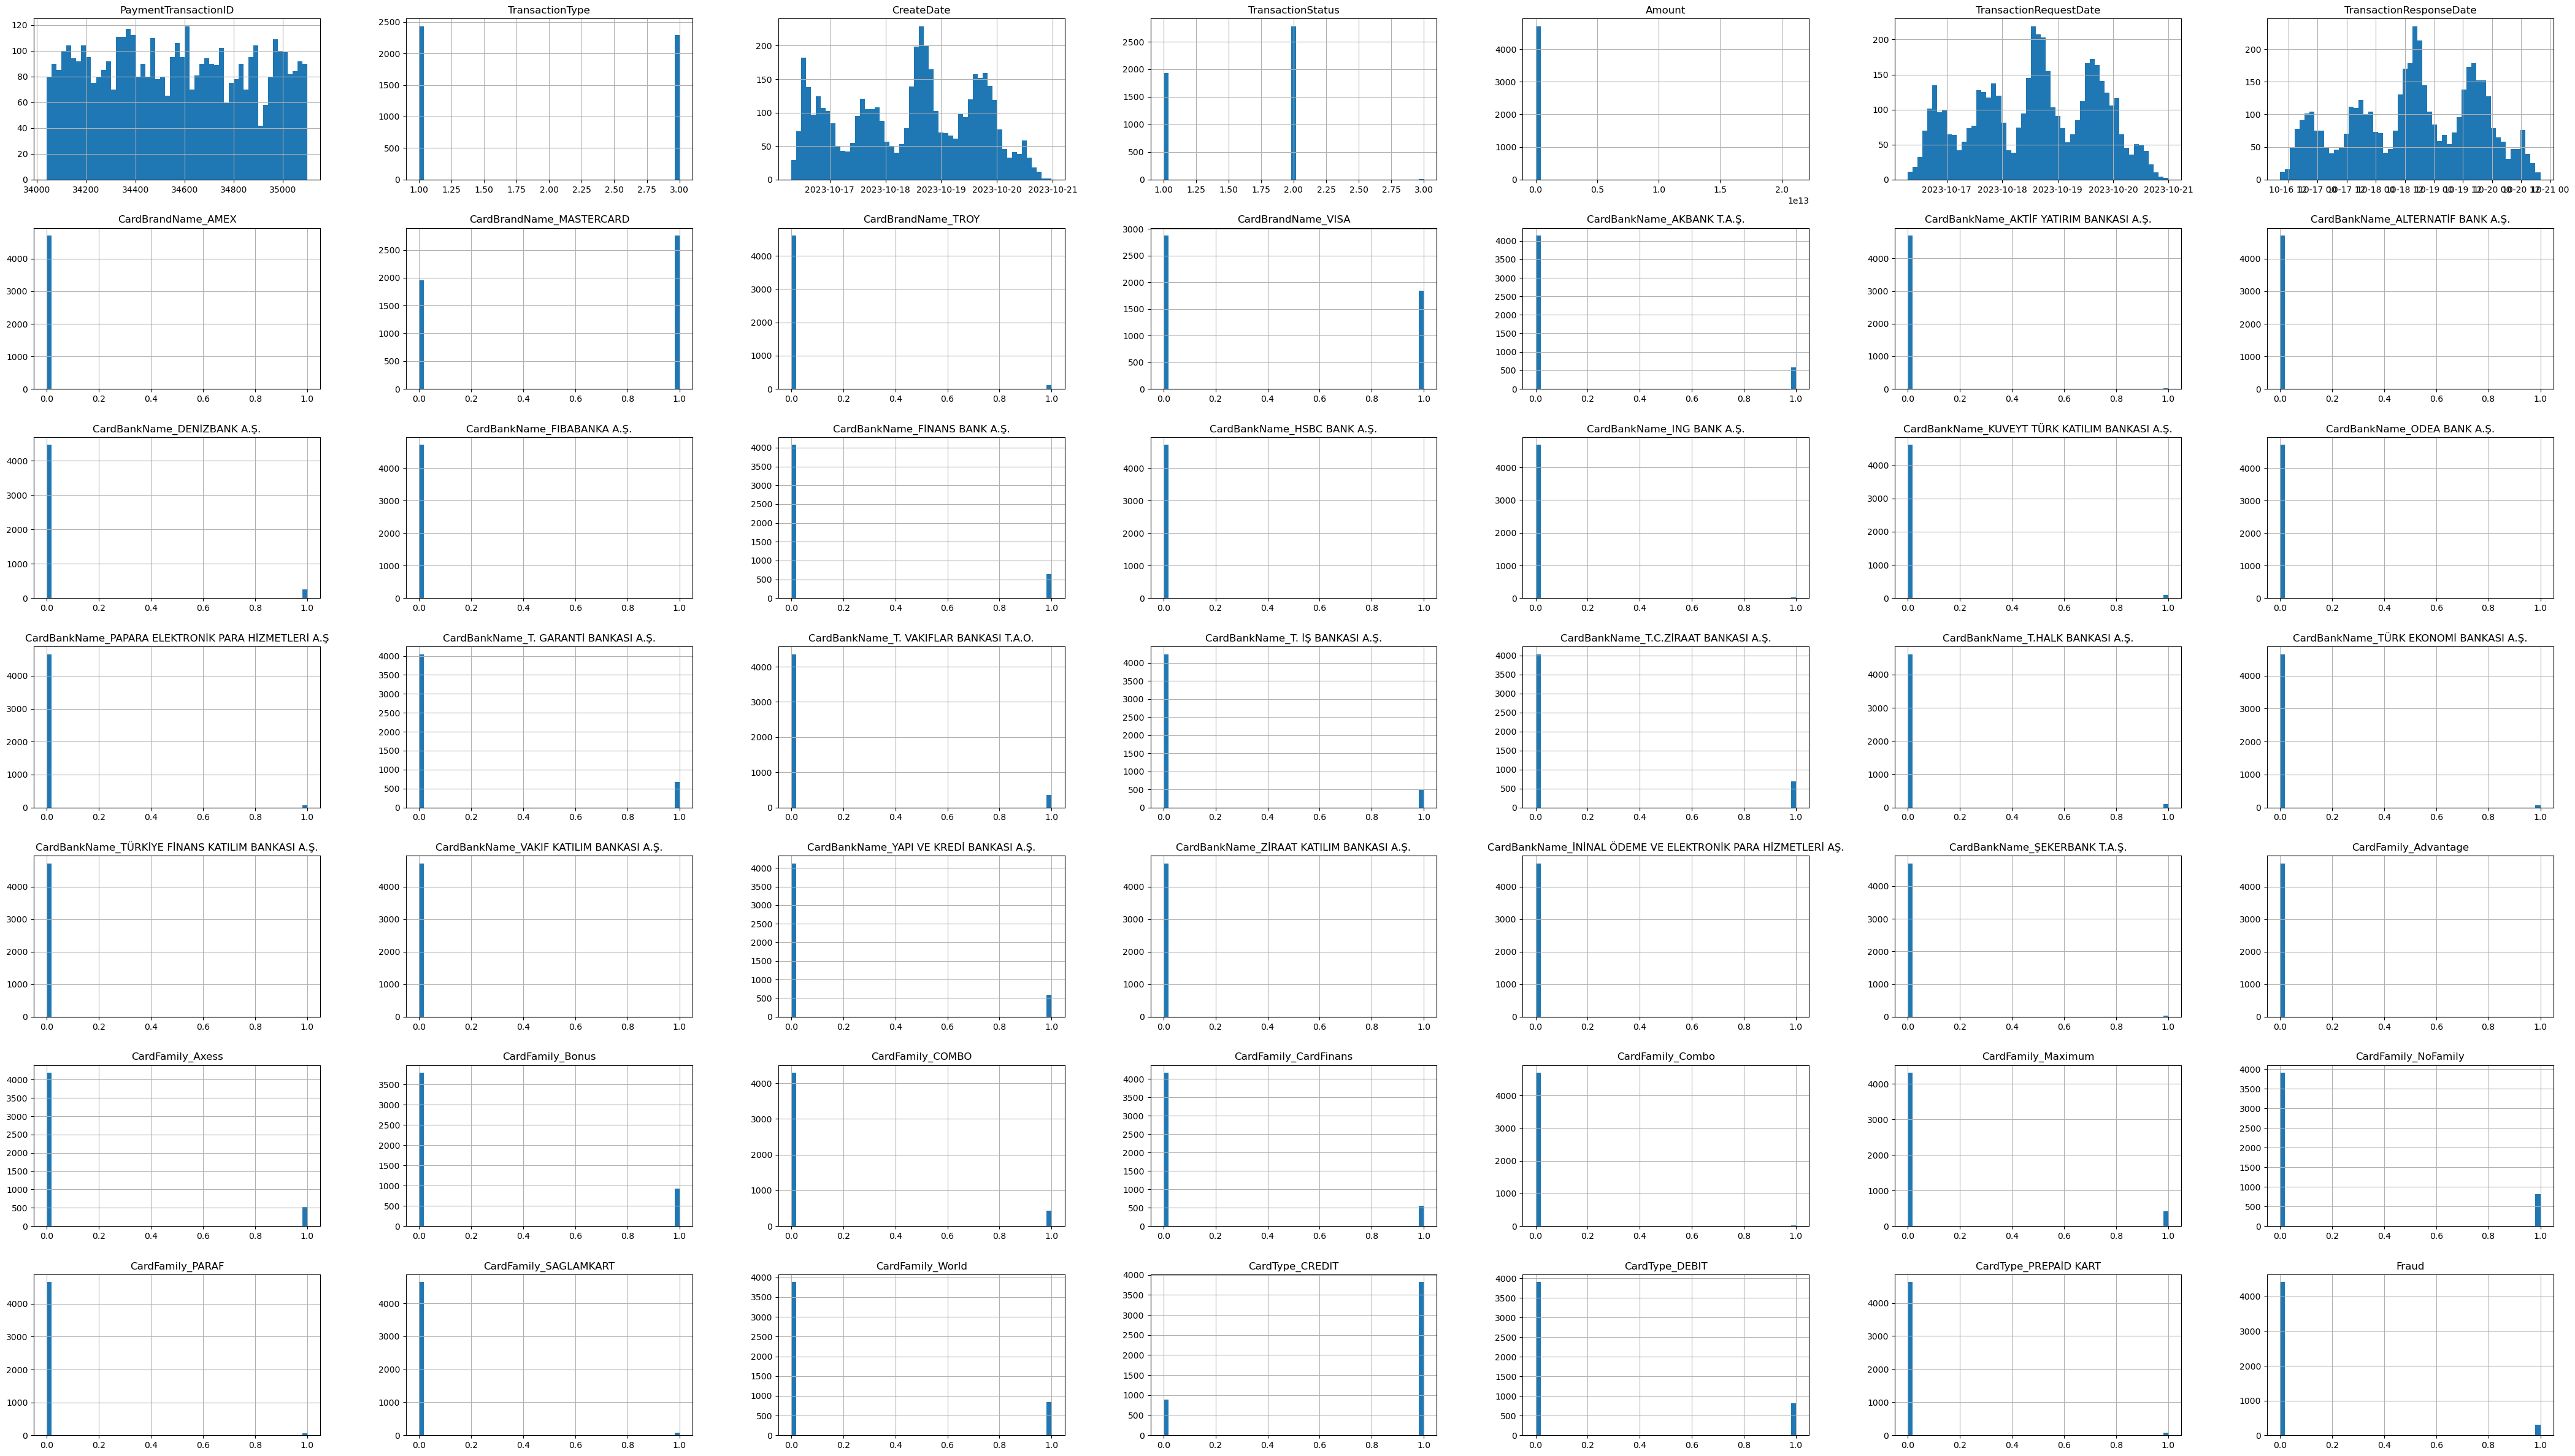

In [22]:
df_final.hist(bins = 53, figsize = (53, 30))

In [23]:
df_final.columns
df_final = df_final[df_final['TransactionStatus'] != 3]
print(df_final['TransactionStatus'].value_counts())

2    2780
1    1934
Name: TransactionStatus, dtype: int64


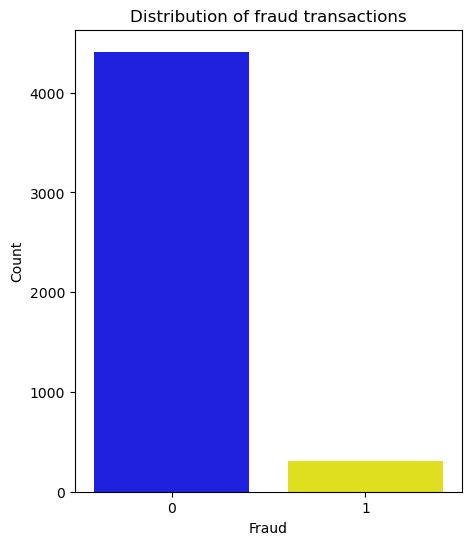

0    4410
1     304
Name: Fraud, dtype: int64


In [24]:
plt.figure(figsize = (5,6))
sns.countplot(x = 'Fraud', data = df_final,  palette = ['blue', 'yellow'])
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of fraud transactions')
plt.show()
print(df_final['Fraud'].value_counts())

In [25]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 50 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   PaymentTransactionID                                         4415 non-null   int64         
 1   Pan                                                          4415 non-null   object        
 2   TransactionType                                              4415 non-null   int64         
 3   CreateDate                                                   4415 non-null   datetime64[ns]
 4   TransactionStatus                                            4415 non-null   int64         
 5   Amount                                                       4415 non-null   float64       
 6   TransactionRequestDate                                       4415 non-null   datetime64[ns]
 7   TransactionResp

In [31]:
df_final['AmountDiff'] = df_final.groupby('Pan')['Amount'].diff().fillna(0)
df_final['TimeDiff'] = df_final.groupby('Pan')['CreateDate'].diff().dt.total_seconds().fillna(0)

In [67]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_final.drop(columns=['Fraud', 'PaymentTransactionID', 'Pan', 'CreateDate', 'TransactionRequestDate', 'TransactionResponseDate'])
y = df_final['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
df_final.head(60)

,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName_AMEX,CardBrandName_MASTERCARD,...,CardFamily_NoFamily,CardFamily_PARAF,CardFamily_SAGLAMKART,CardFamily_World,CardType_CREDIT,CardType_DEBIT,CardType_PREPAİD KART,Fraud,AmountDiff,TimeDiff
0,34740,374427*****6014,3,2023-10-16 19:02:28.585145344,2,315.744366,2023-10-19 09:48:19.057973760,2023-10-18 20:40:21.235217408,1,0,...,0,0,0,0,1,0,0,0,0.000000,0.000000
1,34740,374427*****6014,3,2023-10-16 22:40:26.806660096,2,302.815606,2023-10-18 00:24:37.730450688,2023-10-18 21:34:49.420031744,1,0,...,0,0,0,0,1,0,0,0,-12.928761,13078.221515
2,34740,374427*****6014,3,2023-10-17 13:40:28.686499072,2,304.321379,2023-10-20 10:33:26.852194048,2023-10-19 11:05:12.514173696,1,0,...,0,0,0,0,1,0,0,0,1.505774,54001.879839
3,34740,374427*****6014,3,2023-10-18 17:15:51.130193152,2,310.290479,2023-10-19 17:52:22.907896832,2023-10-19 14:13:01.305662464,1,0,...,0,0,0,0,1,0,0,0,5.969100,99322.443694
4,34740,374427*****6014,3,2023-10-18 17:44:36.482940160,2,332.873866,2023-10-19 19:09:55.520452864,2023-10-17 01:58:02.345482496,1,0,...,0,0,0,0,1,0,0,0,22.583387,1725.352747
5,34107,402278******4574,3,2023-10-16 19:31:08.397125120,2,234.920331,2023-10-18 11:01:44.781535232,2023-10-20 04:49:56.754917120,0,0,...,0,0,0,0,1,0,0,0,0.000000,0.000000
6,34107,402278******4574,3,2023-10-16 23:55:12.533004800,2,230.582862,2023-10-19 13:05:10.897021696,2023-10-17 13:35:21.063893248,0,0,...,0,0,0,0,1,0,0,0,-4.337470,15844.135880
7,34654,402278******4574,3,2023-10-17 01:43:45.730836992,2,267.770093,2023-10-18 18:42:01.196087552,2023-10-19 09:20:54.837556480,0,0,...,0,0,0,0,1,0,0,0,37.187231,6513.197832
8,34654,402278******4574,3,2023-10-17 04:10:26.143820032,2,246.353830,2023-10-18 09:49:38.877100544,2023-10-18 07:37:42.702343936,0,0,...,0,0,0,0,1,0,0,0,-21.416262,8800.412983
9,34107,402278******4574,3,2023-10-17 12:42:06.028418048,2,233.463473,2023-10-19 00:21:16.408758784,2023-10-20 08:54:30.650759936,0,0,...,0,0,0,0,1,0,0,0,-12.890357,30699.884598


In [37]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve
from math import sqrt

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'K-neighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}

param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'GradientBoosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 6]
    },
    'LogisticRegression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'K-neighbors': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 10, 20]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'MLP': {
        'classifier__hidden_layer_sizes': [(100,), (100, 100)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__alpha': [0.0001, 0.001]
    },
    'NaiveBayes': {
        
    }, 
    'Bagging': {
        'classifier__n_estimators': [10, 50, 100],
        'classifier__max_samples': [0.5, 1.0],
        'classifier__max_features': [0.5, 1.0]
    },
    'ExtraTrees': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    }
}

In [38]:
from sklearn.metrics import classification_report, roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
best_scores = {}
model_auc_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with SMOTE on training data...")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    print(f"Best {model_name} Score: {grid_search.best_score_}")
    print(f"Best {model_name} Params: {grid_search.best_params_}")

for model_name, model in best_models.items():
    print(f"\nPerformance of {model_name} on original test data:")
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except AttributeError:
        auc = roc_auc_score(y_test, model.decision_function(X_test))
        
    print(f"AUC: {auc:.4f}")
    model_auc_scores[model_name] = auc

best_model_name = max(model_auc_scores, key=model_auc_scores.get)
best_auc = model_auc_scores[best_model_name]

print(f"\nBest model based on AUC score: {best_model_name} with AUC: {best_auc:.4f}")


Training RandomForest with SMOTE on training data...
Best RandomForest Score: 0.9745619065741902
Best RandomForest Params: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Training GradientBoosting with SMOTE on training data...
Best GradientBoosting Score: 0.971969501112212
Best GradientBoosting Params: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Training SVM with SMOTE on training data...
Best SVM Score: 0.9598173216359687
Best SVM Params: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Training XGBoost with SMOTE on training data...
Best XGBoost Score: 0.9828254778574663
Best XGBoost Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Training LogisticRegression with SMOTE on training data...
Best LogisticRegression Score: 0.9617619538185946
Best LogisticRegression Params: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Training K-neighbors with SMOTE

/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/livan/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

Best AdaBoost Score: 0.9614383296478323
Best AdaBoost Params: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 200}
Training MLP with SMOTE on training data...
Best MLP Score: 0.9711601782163924
Best MLP Params: {'classifier__activation': 'relu', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100, 100)}
Training NaiveBayes with SMOTE on training data...
Best NaiveBayes Score: 0.8363586375238683
Best NaiveBayes Params: {}
Training Bagging with SMOTE on training data...
Best Bagging Score: 0.9734276471630391
Best Bagging Params: {'classifier__max_features': 0.5, 'classifier__max_samples': 1.0, 'classifier__n_estimators': 100}
Training ExtraTrees with SMOTE on training data...
Best ExtraTrees Score: 0.9726172743915642
Best ExtraTrees Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}

Performance of RandomForest on original test data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      132

Best XGBoost Params: {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300, 'classifier__subsample': 1.0}
Best threshold for maximum F1-score: 0.6182
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1324
           1       0.77      0.76      0.76        91

    accuracy                           0.97      1415
   macro avg       0.88      0.87      0.87      1415
weighted avg       0.97      0.97      0.97      1415

AUC: 0.9875


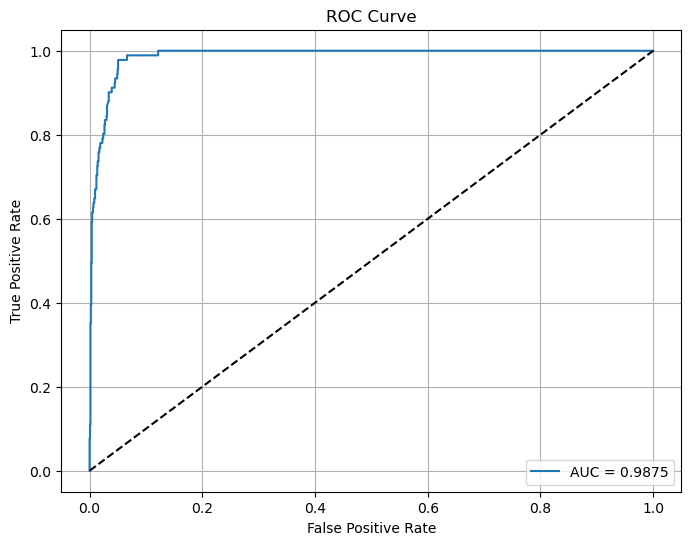

In [59]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# Pipeline ve GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Veri ölçeklendirme
    ('classifier', XGBClassifier(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid_xgb, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best XGBoost Params: {best_params}")

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for maximum F1-score: {best_threshold:.4f}")

y_pred_threshold = (y_pred_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_threshold))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")
# ROC eğrisini çiz
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Yansıtıcı olarak, eğri 45 derecede olursa tahminler rastgeledir
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()